<a href="https://colab.research.google.com/github/naveenbreddy/Data-Science-Portfolio-Projects/blob/main/Customer_churn_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CUSTOMER CHURN PREDICTION - USING MACHINE LEARNING MODELING TECHNIQUES

---

Using different Machine learning algoriths we will try to predict the customer churn - which happens to be one of th emost critical KPIs for any customer anlaytics based businesses. 

1. Loading dependencies
2. EDA 
3. Data Visualization
4. Modeling
5. Deployment


Notes:

As its a binary classification problem, need to check if its balanced or not?

##1. Importing Dependencies

In [221]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [306]:
from sklearn.ensemble._hist_gradient_boosting.gradient_boosting import train_test_split
#Importing the datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics

from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv")

##2. EDA

In [223]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [224]:
df.shape

(7043, 21)

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


There are no null values in the dataset.

In [226]:
#check if its a balanced dataset
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [227]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<Axes: >

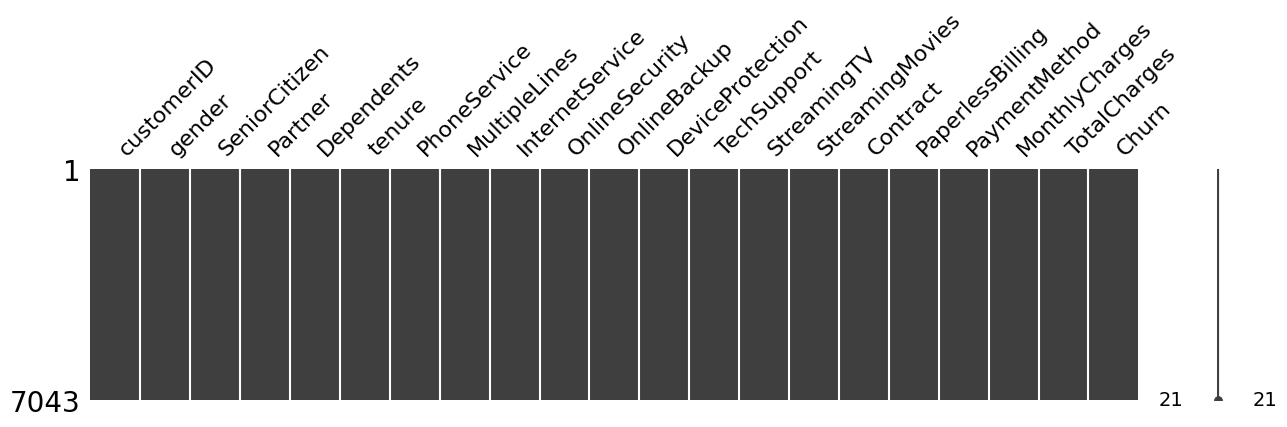

In [228]:
#missing values visuailzation:
msno.matrix(df, figsize=(15,3))

<Axes: >

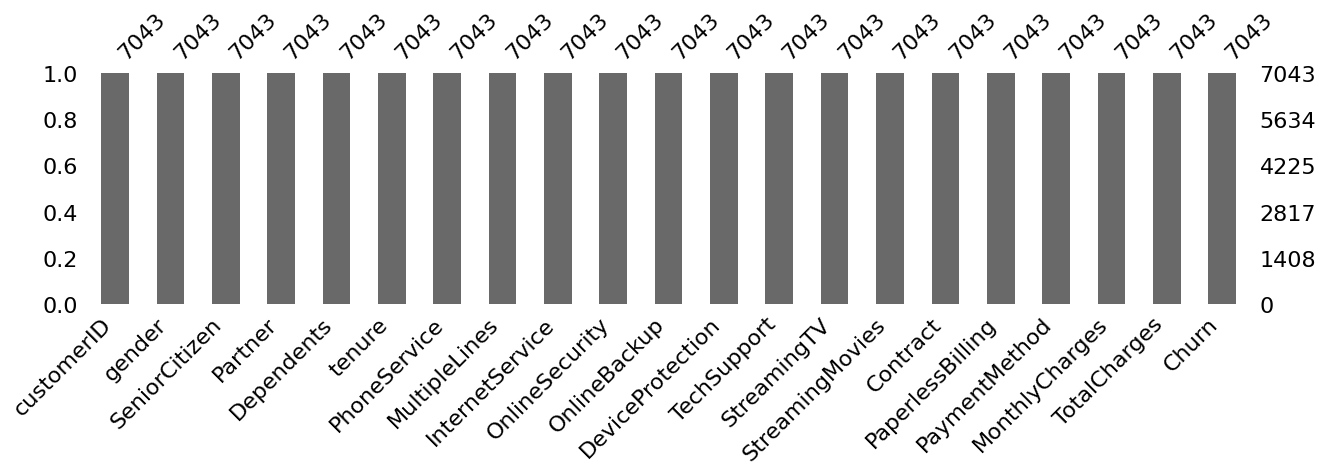

In [229]:
msno.bar(df, figsize=(15,3))

In [230]:
#converting total_charges to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

In [231]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [232]:
#seems like there are some null values
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No





*   looks like total charges is tenure in months times monthly charges. We can 
impute missing values by using that
*   Also the tenure column is 0 for these columns so lets impute 0s into the Total charges column




In [233]:
df['TotalCharges'].fillna('0',inplace = True)

##Lets create a function to do some initial labelling. This also helps us with finding correlation among non-numeric columns after labelling them

In [234]:
df.iloc[0:20,15:20]

,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Month-to-month,Yes,Electronic check,29.85,29.85
1,One year,No,Mailed check,56.95,1889.5
2,Month-to-month,Yes,Mailed check,53.85,108.15
3,One year,No,Bank transfer (automatic),42.30,1840.75
4,Month-to-month,Yes,Electronic check,70.70,151.65
5,Month-to-month,Yes,Electronic check,99.65,820.5
6,Month-to-month,Yes,Credit card (automatic),89.10,1949.4
7,Month-to-month,No,Mailed check,29.75,301.9
8,Month-to-month,Yes,Electronic check,104.80,3046.05
9,One year,No,Bank transfer (automatic),56.15,3487.95


In [235]:
copy1 = df.copy()
single_label_cols = ['Partner','Dependents','PhoneService','PaperlessBilling']
le = LabelEncoder()

for i in single_label_cols:
  copy1[i] = le.fit_transform(copy1[i])


<ipython-input-236-dd55f68145bb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(copy1.corr())


<Axes: >

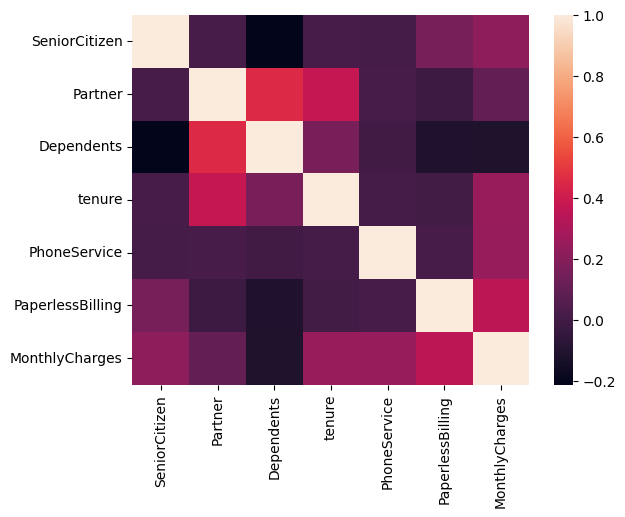

In [236]:
sns.heatmap(copy1.corr())

In [237]:
non_numeric_cols = ['gender','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod','Churn']

for i in non_numeric_cols:
  copy1[i] = le.fit_transform(copy1[i])

In [238]:
copy1['TotalCharges']=copy1['TotalCharges'].astype(float)

<ipython-input-239-b01b697af866>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(copy1.corr())


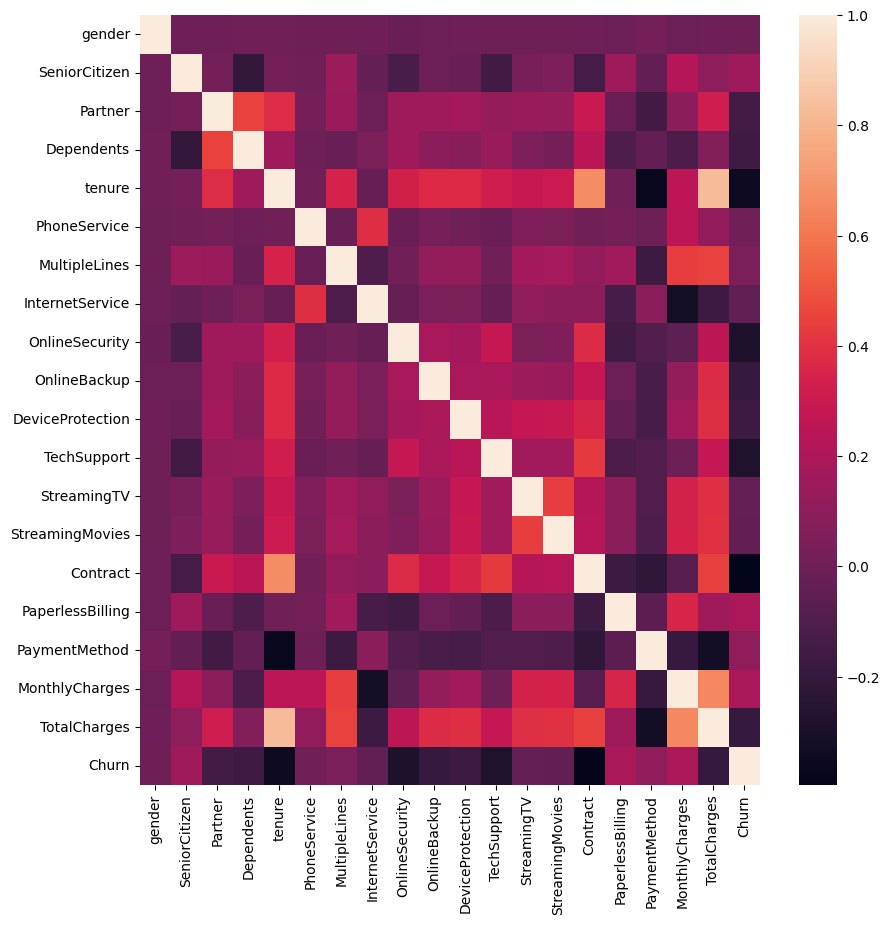

In [239]:
plt.subplots(figsize = (10,10))
sns.heatmap(copy1.corr())
plt.show()



1.   Tenure, contract and Total charges account for churn - probably loyal customer base
2.   some other features are also highly correlated to each other - like internet service with monthly charges. Multi collinearity issues?




## Look at some distributions:

Looking at some distribution of columns:
correlation among - if there is any highest correlation

<Axes: xlabel='Churn', ylabel='count'>

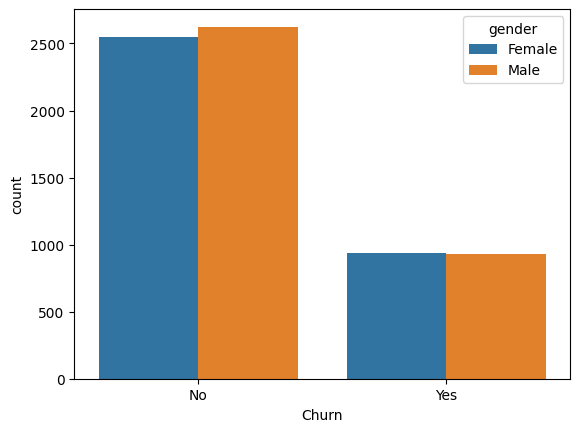

In [240]:
sns.countplot(x = df['Churn'], hue= df['gender'])

Sounds like theres equal division in the sex among churned customers

In [241]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<Axes: xlabel='Contract', ylabel='Churn'>

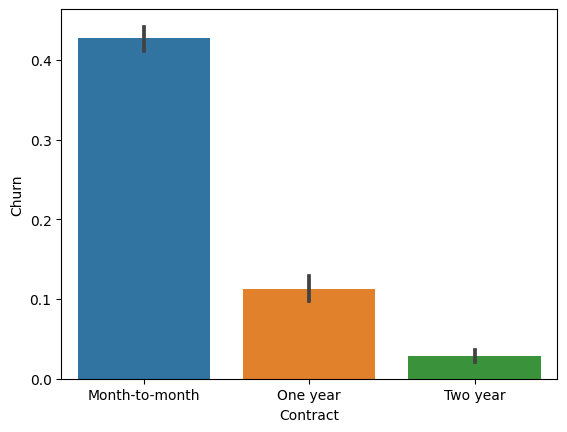

In [242]:
sns.barplot(x = df['Contract'], y = copy1['Churn'])

if the customers are going for month - month contracts - there is a higher possibility of losing the customer.

<Axes: xlabel='Churn', ylabel='TotalCharges'>

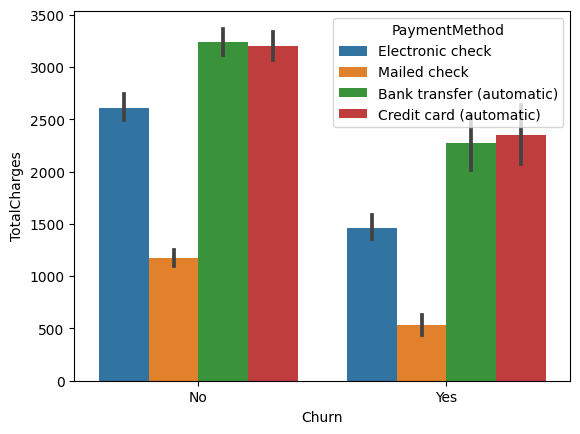

In [243]:
sns.barplot(data = copy1, x = df['Churn'], y = 'TotalCharges', hue = df['PaymentMethod'])

TotalCharges are high indicating loyal customer base may be so the churn is lesser.

<ipython-input-244-dd526af90e9f>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x  = copy1[df['Churn']=='Yes'].TotalCharges, shade = True)
<ipython-input-244-dd526af90e9f>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x  = copy1[df['Churn']=='No'].TotalCharges, shade = True)


<Axes: xlabel='TotalCharges', ylabel='Density'>

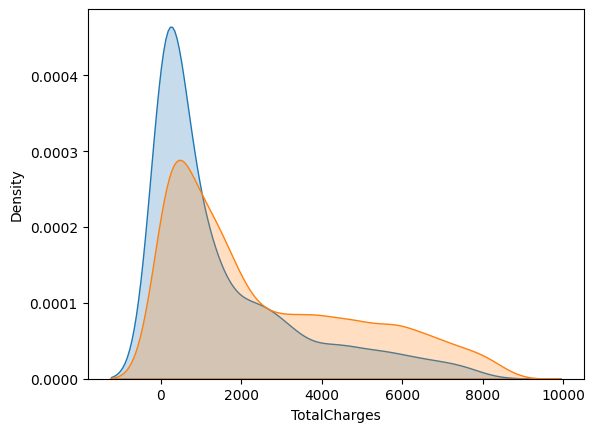

In [244]:
sns.kdeplot(x  = copy1[df['Churn']=='Yes'].TotalCharges, shade = True)
sns.kdeplot(x  = copy1[df['Churn']=='No'].TotalCharges, shade = True)

#Data preprocessing:

In [245]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [246]:
#Lets divide the dataset into train test before doing the preprocessing:
copy1 = df.copy()

X = copy1.drop('Churn', axis = 1)
y = copy1['Churn']

In [247]:
 A = pd.get_dummies(X[['gender','Partner','Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod']])
 X = pd.concat([X,A], axis = 1)


In [248]:
X= X.drop(['gender','Partner','Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'], axis = 1)

In [249]:
X.drop('customerID', axis = 1, inplace= True)

In [250]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In order to rightly scale the data - I need to know which kind of distribution are these numeric columns on?

In [258]:
def draw_histplot(df_series):
  plt.figure(figsize = (10,3))
  sns.histplot(df_series, kde = True)

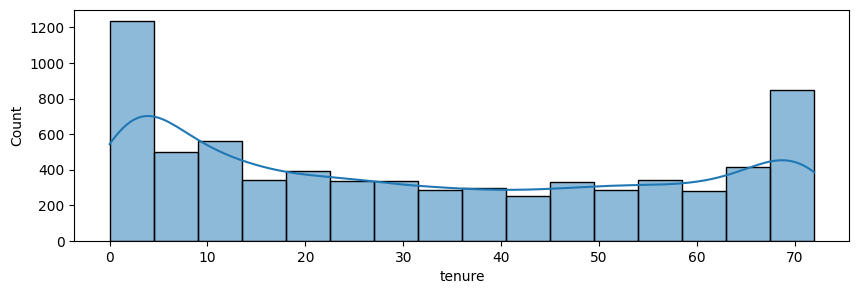

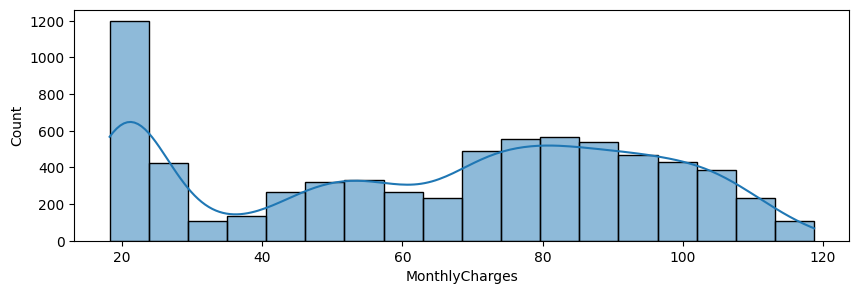

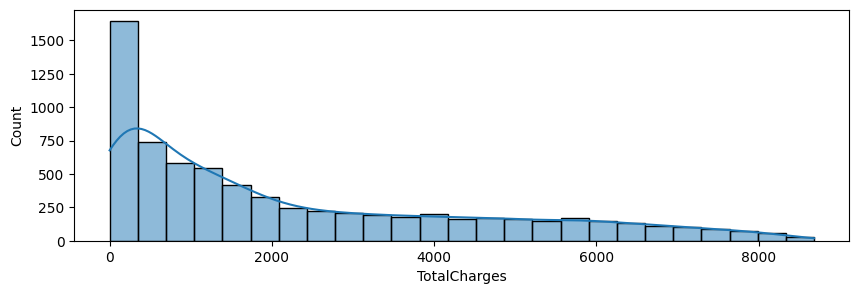

In [259]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for val in num_cols:
  draw_histplot(df[val])

None of the distributions are of normal dist hence we are going to use standard scaler

In [253]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
scaler= StandardScaler()

X[num_cols] = scaler.fit_transform(X[num_cols])

In [254]:
X.head(10)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.277445,-1.160323,-0.992611,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,0.066327,-0.259629,-0.172165,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,-1.236724,-0.362660,-0.958066,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,0.514251,-0.746535,-0.193672,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,-1.236724,0.197365,-0.938874,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
5,0,-0.992402,1.159546,-0.643789,1,0,1,0,1,0,...,1,1,0,0,0,1,0,0,1,0
6,0,-0.422317,0.808907,-0.145738,0,1,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
7,0,-0.910961,-1.163647,-0.872587,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
8,0,-0.177995,1.330711,0.338085,1,0,0,1,1,0,...,1,1,0,0,0,1,0,0,1,0
9,0,1.206498,-0.286218,0.533044,0,1,1,0,0,1,...,0,0,1,0,1,0,1,0,0,0


In [255]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Model building

### Random Forest

In [282]:
#Random Forest model:

rf = RandomForestClassifier()
rf_model = rf.fit(X_train,y_train)

selector = SelectFromModel(rf_model, prefit=True)
important_features = X_train.columns[selector.get_support()]

rf_predict = rf_model.predict(X_test)

rf_acc_score = accuracy_score(y_test, rf_predict)
rf_f1_score = f1_score(y_test, rf_predict, average = "binary", pos_label = "Yes")
rf_prec_score = precision_score(y_test, rf_predict, average = "binary", pos_label="Yes")
rf_recal_score = recall_score(y_test, rf_predict, average = "binary", pos_label="Yes")
rf_class_report = classification_report(y_test, rf_predict)

print(f'Accuracy of Random Forest model is {rf_acc_score}')
print(f'f1score of Random Forest model is {rf_f1_score}')
print(f'Precision of Random Forest model is {rf_prec_score}')
print(f'Recall score of Random Forest model is {rf_recal_score}')
print(f'Classification report of Random Forest model is {rf_class_report}')

print(f'Important features for rf: {important_features}')



Accuracy of Random Forest model is 0.7899219304471257
f1score of Random Forest model is 0.5374999999999999
Precision of Random Forest model is 0.6441947565543071
Recall score of Random Forest model is 0.46112600536193027
Classification report of Random Forest model is               precision    recall  f1-score   support

          No       0.82      0.91      0.86      1036
         Yes       0.64      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409

Important features for rf: Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'OnlineSecurity_No',
       'TechSupport_No', 'Contract_Month-to-month',
       'PaymentMethod_Electronic check'],
      dtype='object')


Very bad precision and recal score for random forest!

### KNN

In [286]:
knn = KNeighborsClassifier(n_neighbors= 10)

knn_model = knn.fit(X_train,y_train)
# selector = SelectFromModel(knn_model, prefit=True)
# important_features = X_train.columns[selector.get_support()]

knn_predict = knn_model.predict(X_test)

knn_acc_score = accuracy_score(y_test, knn_predict)
knn_f1_score = f1_score(y_test, knn_predict, average = "binary", pos_label = "Yes")
knn_prec_score = precision_score(y_test, knn_predict, average = "binary", pos_label="Yes")
knn_recal_score = recall_score(y_test, knn_predict, average = "binary", pos_label="Yes")
knn_class_report = classification_report(y_test, knn_predict)

print(f'Accuracy of KNN model is {knn_acc_score}')
print(f'f1score of KNN model is {knn_f1_score}')
print(f'Precision of KNN model is {knn_prec_score}')
print(f'Recall score of KNN model is {knn_recal_score}')
print(f'Classification report of KNN model is {knn_class_report}')

# print(f'Important features for rf: {important_features}')


Accuracy of KNN model is 0.8005677785663591
f1score of KNN model is 0.5748865355521937
Precision of KNN model is 0.6597222222222222
Recall score of KNN model is 0.5093833780160858
Classification report of KNN model is               precision    recall  f1-score   support

          No       0.84      0.91      0.87      1036
         Yes       0.66      0.51      0.57       373

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



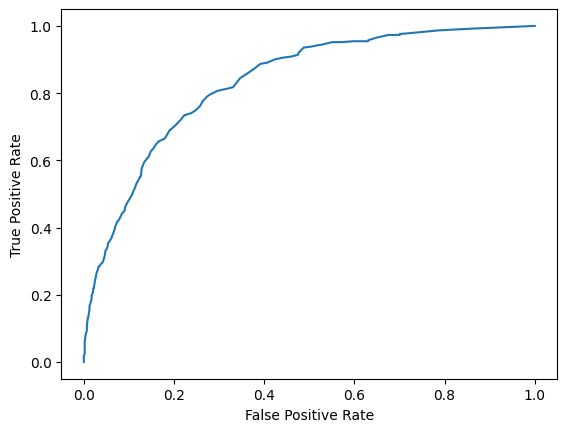

In [294]:
#Checking AUC for rf:
rf_pred_proba = rf_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  rf_pred_proba, pos_label='Yes')

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### SVM

In [287]:
svm = SVC(kernel= "linear")

svm.fit(X_train,y_train)
# selector = SelectFromModel(knn_model, prefit=True)
# important_features = X_train.columns[selector.get_support()]

svm_predict = svm.predict(X_test)

svm_acc_score = accuracy_score(y_test, svm_predict)
svm_f1_score = f1_score(y_test, svm_predict, average = "binary", pos_label = "Yes")
svm_prec_score = precision_score(y_test, svm_predict, average = "binary", pos_label="Yes")
svm_recal_score = recall_score(y_test, svm_predict, average = "binary", pos_label="Yes")
svm_class_report = classification_report(y_test, svm_predict)

print(f'Accuracy of KNN model is {svm_acc_score}')
print(f'f1score of KNN model is {svm_f1_score}')
print(f'Precision of KNN model is {svm_prec_score}')
print(f'Recall score of KNN model is {svm_recal_score}')
print(f'Classification report of KNN model is {svm_class_report}')

# print(f'Important features for rf: {important_features}')

Accuracy of KNN model is 0.8211497515968772
f1score of KNN model is 0.6379310344827587
Precision of KNN model is 0.6873065015479877
Recall score of KNN model is 0.5951742627345844
Classification report of KNN model is               precision    recall  f1-score   support

          No       0.86      0.90      0.88      1036
         Yes       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



### xgboost

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}

# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# rf = RandomForestClassifier()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(train_features, train_labels)

In [309]:
y_train = y_train.map({"Yes":1, "No":0})

In [312]:

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

param_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        'n_estimators':n_estimators
        }
initial_model = xgb.XGBClassifier(learning_rate=0.02, nthread=1)
xgb_model = RandomizedSearchCV(estimator=initial_model, param_distributions=param_grid,n_iter=100, cv=3,verbose=1, random_state=42, n_jobs=-1)
xgb_model.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           nthread=1, num_parallel_tree=None,
                                           predictor=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [1, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, verbose=1)

In [316]:
y_test = y_test.map({"Yes":1, "No":0})

In [317]:
# selector = SelectFromModel(xgb_model, prefit=True)
# important_features = X_train.columns[selector.get_support()]

xgb_predict = xgb_model.predict(X_test)

xgb_acc_score = accuracy_score(y_test, xgb_predict)
xgb_f1_score = f1_score(y_test, xgb_predict, average = "binary")
xgb_prec_score = precision_score(y_test, xgb_predict, average = "binary")
xgb_recal_score = recall_score(y_test, xgb_predict, average = "binary")
xgb_class_report = classification_report(y_test, xgb_predict)

print(f'Accuracy of KNN model is {xgb_acc_score}')
print(f'f1score of KNN model is {xgb_f1_score}')
print(f'Precision of KNN model is {xgb_prec_score}')
print(f'Recall score of KNN model is {xgb_recal_score}')
print(f'Classification report of KNN model is {xgb_class_report}')

# print(f'Important features for rf: {important_features}')

Accuracy of KNN model is 0.8147622427253371
f1score of KNN model is 0.6098654708520179
Precision of KNN model is 0.6891891891891891
Recall score of KNN model is 0.546916890080429
Classification report of KNN model is               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.55      0.61       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.74      1409
weighted avg       0.81      0.81      0.81      1409

